In [79]:
import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
from transformers import pipeline
import seaborn as sns
import functions
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
classifier = pipeline("sentiment-analysis")

In [3]:
e = pickle.load(open('textblob_file.p', 'rb'))
df = e.copy()

In [77]:
df.head()

,news,target,diff,sent,concat_news,word_count,trans_pos,trans_neg,trans_comp
0,[etoro ceo yoni assia on reaching 12 million u...,1,4.5,pos,etoro ceo yoni assia on reaching 12 million us...,"{'etoro': 1, 'ceo': 1, 'yoni': 1, 'assia': 1, ...",0.536738,-1.581370,-1.044633
1,[government confirms crypto profits not taxabl...,0,-223.3,neg,government confirms crypto profits not taxable...,"{'government': 2, 'confirms': 1, 'crypto': 2, ...",1.624722,-4.743640,-3.118918
2,[ticker tool uses the bch blockchain to provid...,1,378.1,pos,ticker tool uses the bch blockchain to provide...,"{'ticker': 1, 'tool': 1, 'uses': 1, 'bch': 2, ...",0.000000,-7.297920,-7.297920
3,[crypto fundraising is changing again in 2020 ...,0,-2.0,neg,crypto fundraising is changing again in 2020 p...,"{'crypto': 2, 'fundraising': 1, 'changing': 1,...",3.887353,-1.929447,1.957906
4,[subhash chandra garg on the future of crypto ...,0,-5.7,neg,subhash chandra garg on the future of crypto r...,"{'subhash': 1, 'chandra': 1, 'garg': 1, 'futur...",1.972945,-2.779915,-0.806970


In [75]:
# for i in tqdm(range(336)):
#     po = 0
#     ne = 0
#     for j in df['news'][i]:
#         p = 0
#         n = 0
#         res = classifier(j)
#         if 'NEGATIVE' in res[0].values():
#             n = res[0]['score']*-1
#             ne += n
#         else:
#             p = res[0]['score']
#             po += p 
#     #print(po)
#     #print(ne)
    
#     df['trans_pos'][i] = po
#     df['trans_neg'][i] = ne


In [81]:
def different_shift_diff(l1,l2,l3,legend,title):
    MW = []
    for i in range(-19,21):
        MW.append(i)
    plt.rcParams["figure.figsize"] = (25,8)     
    plt.plot(MW,l1)
    plt.plot(MW,l2)
    plt.plot(MW,l3)
    #plt.plot(MW,l4)
    #plt.plot(MW,l5)
    plt.suptitle(title, fontsize=30)
    plt.legend((legend), fontsize = 20)
    plt.ylabel('Correlation',fontsize = 25)
    plt.xlabel('Shift',fontsize = 25) 
    
def shift_correlation(df,a,b,max_lag):
    shift = []
    for i in range(max_lag):
        leg = i-max_lag
        shift.append(df[a].shift(leg).corr(df[b])) 
    for l in range(max_lag):
        shift.append(df[a].shift(l).corr(df[b]))    
    return shift[::-1]    

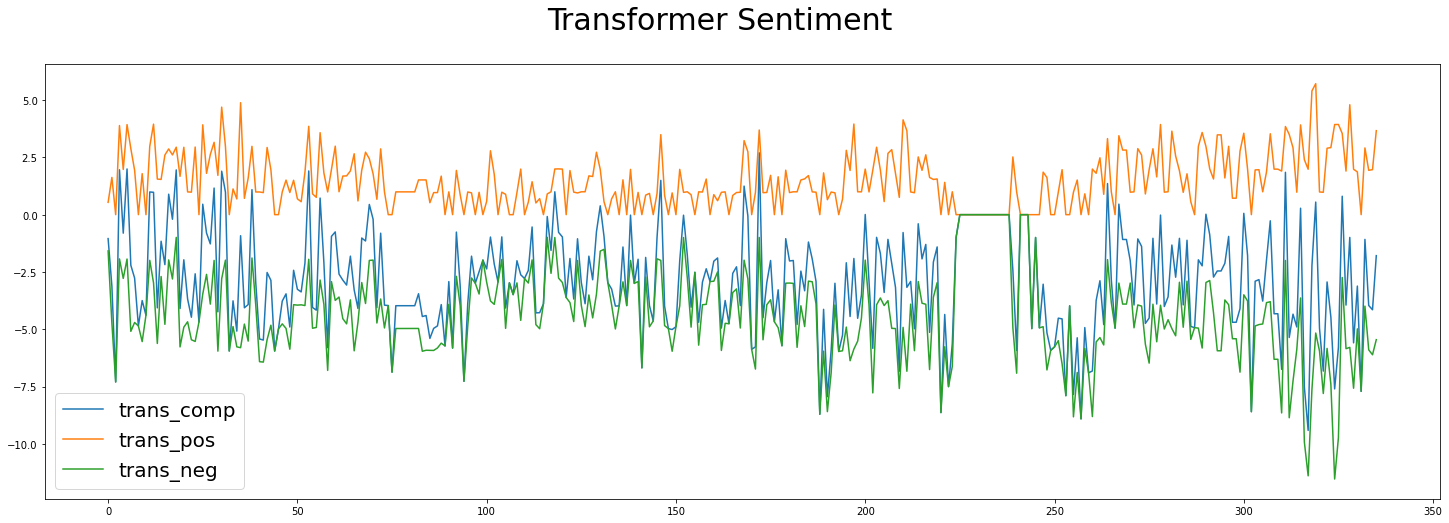

In [80]:
functions.different_sentiment_plot(df,'trans_comp','trans_pos','trans_neg', 'Transformer Sentiment') 

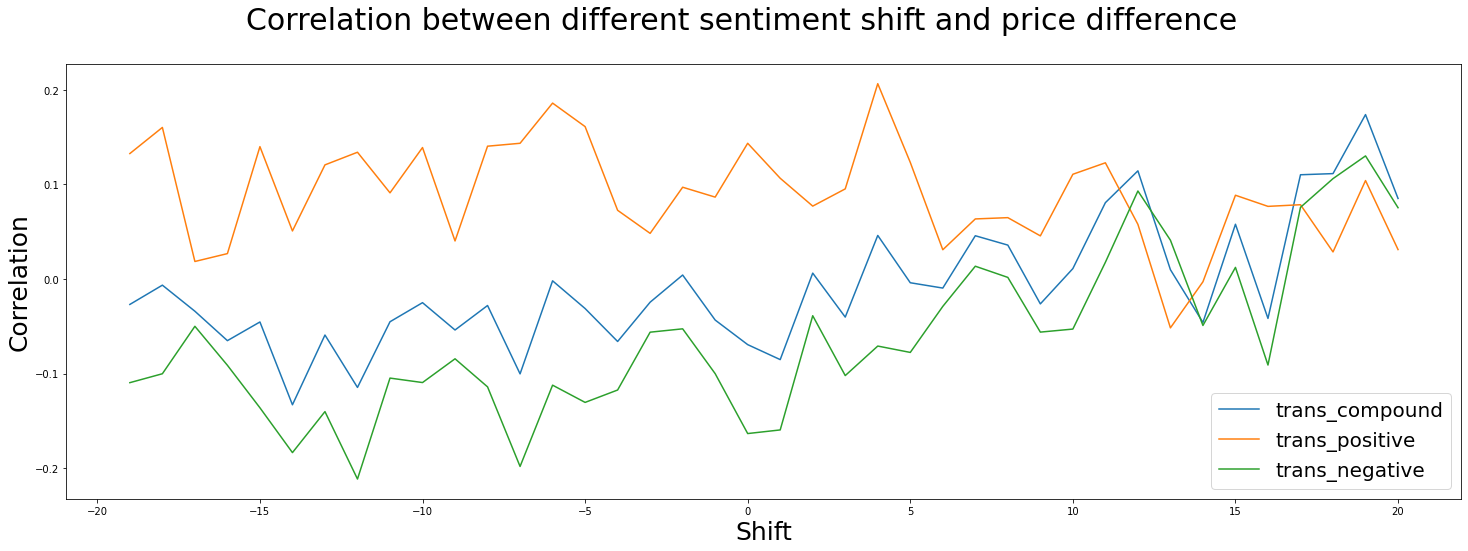

In [82]:
trans_compound = shift_correlation(df,'trans_comp','diff',20)
trans_positive = shift_correlation(df,'trans_pos','diff',20)
trans_negative = shift_correlation(df,'trans_neg','diff',20)
different_shift_diff(trans_compound,trans_positive,trans_negative,legend=['trans_compound','trans_positive','trans_negative',],title='Correlation between different sentiment shift and price difference')

Text(0.5, 0.98, 'correlation between Compound, positive and negative sentiment and price difference with increasing MAW')

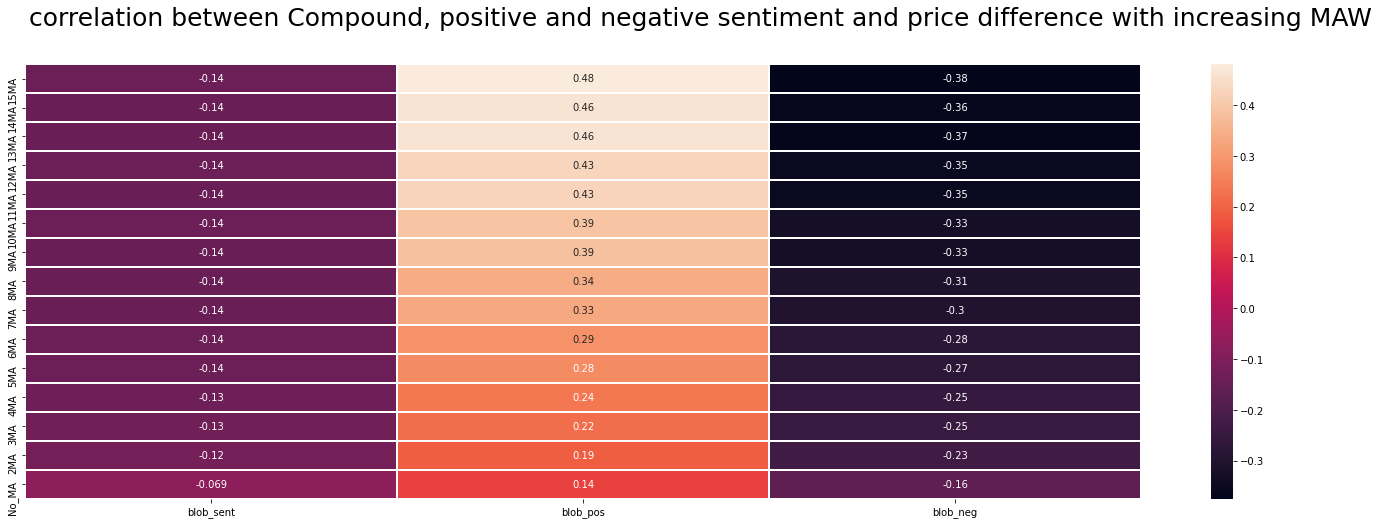

In [85]:
functions.diff_16MAW(df,'trans_comp','trans_pos','trans_neg')
plt.suptitle('correlation between Compound, positive and negative sentiment and price difference with increasing MAW',fontsize = 25)

<AxesSubplot:title={'center':'correlation of transformer compound sentiment with different MAW and price difference with different shifts'}>

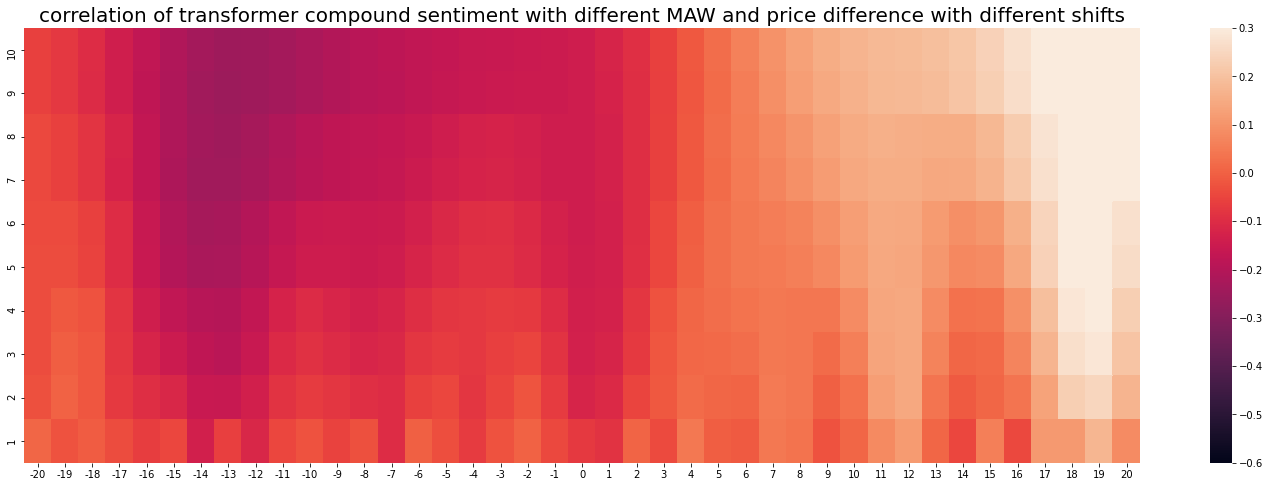

In [86]:
plt.title('correlation of transformer compound sentiment with different MAW and price difference with different shifts', fontsize = 20) 
corrs, wlabels, llabels = functions.find_corr_matrix(df,'trans_comp','diff',range(-20,20+1),windows = range(1,10+1))  
sns.heatmap(corrs, xticklabels=llabels, yticklabels=wlabels, vmin=-0.6, vmax=0.3, annot = False)

<AxesSubplot:title={'center':'correlation of transformer positive sentiment with different MAW and price difference with different shifts'}>

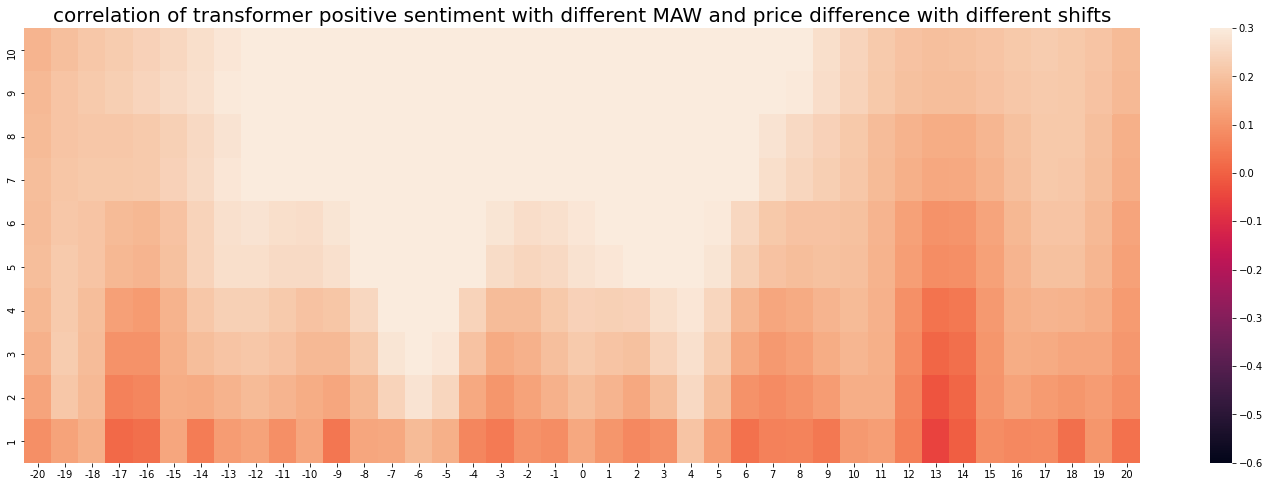

In [87]:
plt.title('correlation of transformer positive sentiment with different MAW and price difference with different shifts', fontsize = 20) 
corrs, wlabels, llabels = functions.find_corr_matrix(df,'trans_pos','diff',range(-20,20+1),windows = range(1,10+1))  
sns.heatmap(corrs, xticklabels=llabels, yticklabels=wlabels, vmin=-0.6, vmax=0.3, annot = False)

<AxesSubplot:title={'center':'correlation of transformer negative sentiment with different MAW and price difference with different shifts'}>

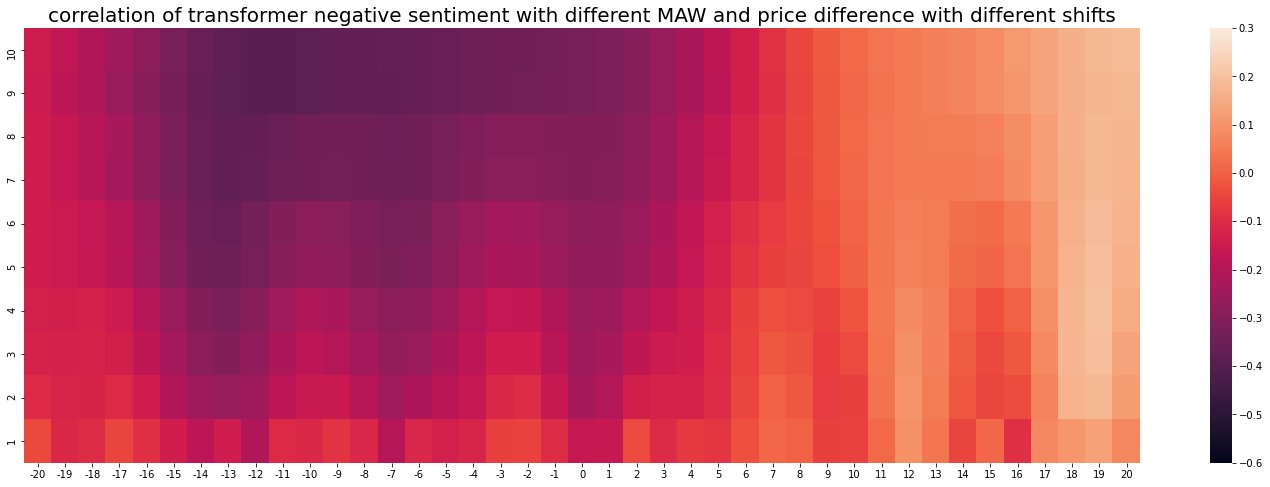

In [88]:
plt.title('correlation of transformer negative sentiment with different MAW and price difference with different shifts', fontsize = 20) 
corrs, wlabels, llabels = functions.find_corr_matrix(df,'trans_neg','diff',range(-20,20+1),windows = range(1,10+1))  
sns.heatmap(corrs, xticklabels=llabels, yticklabels=wlabels, vmin=-0.6, vmax=0.3, annot = False)

# Using concatinated news

In [117]:
# for i in tqdm(range(239,336)):
#     po = 0
#     ne = 0
#     res = classifier(df['concat_news'][i])
#     if 'NEGATIVE' in res[0].values():
#         ne = res[0]['score']*-1
#         df['C_trans_neg'][i] = ne
#     else:
#         po = res[0]['score']
#         df['C_trans_pos'][i] = po


In [120]:
df.head()

,news,target,diff,sent,concat_news,word_count,trans_pos,trans_neg,trans_comp,C_trans_pos,C_trans_neg,C_trans_comp
0,[etoro ceo yoni assia on reaching 12 million u...,1,4.5,pos,etoro ceo yoni assia on reaching 12 million us...,"{'etoro': 1, 'ceo': 1, 'yoni': 1, 'assia': 1, ...",0.536738,-1.581370,-1.044633,0.000000,-0.980409,-0.980409
1,[government confirms crypto profits not taxabl...,0,-223.3,neg,government confirms crypto profits not taxable...,"{'government': 2, 'confirms': 1, 'crypto': 2, ...",1.624722,-4.743640,-3.118918,0.000000,-0.995870,-0.995870
2,[ticker tool uses the bch blockchain to provid...,1,378.1,pos,ticker tool uses the bch blockchain to provide...,"{'ticker': 1, 'tool': 1, 'uses': 1, 'bch': 2, ...",0.000000,-7.297920,-7.297920,0.000000,-0.998350,-0.998350
3,[crypto fundraising is changing again in 2020 ...,0,-2.0,neg,crypto fundraising is changing again in 2020 p...,"{'crypto': 2, 'fundraising': 1, 'changing': 1,...",3.887353,-1.929447,1.957906,0.600908,0.000000,0.600908
4,[subhash chandra garg on the future of crypto ...,0,-5.7,neg,subhash chandra garg on the future of crypto r...,"{'subhash': 1, 'chandra': 1, 'garg': 1, 'futur...",1.972945,-2.779915,-0.806970,0.000000,-0.992501,-0.992501


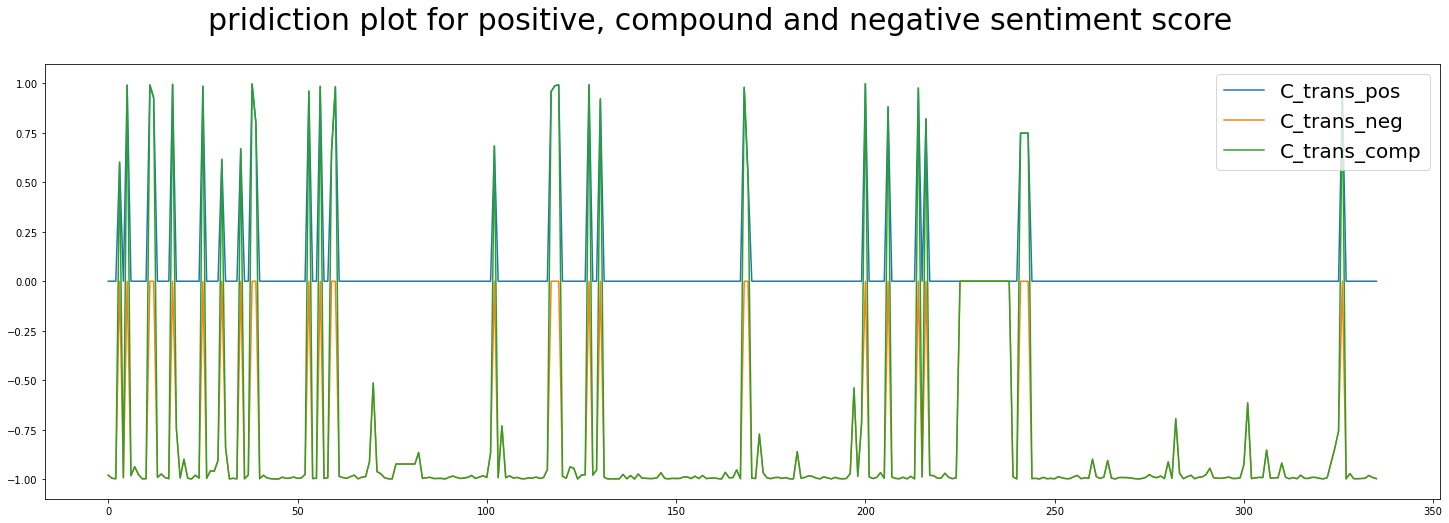

In [121]:
functions.different_sentiment_plot(df,'C_trans_pos','C_trans_neg','C_trans_comp', 'pridiction plot for positive, compound and negative sentiment score')   

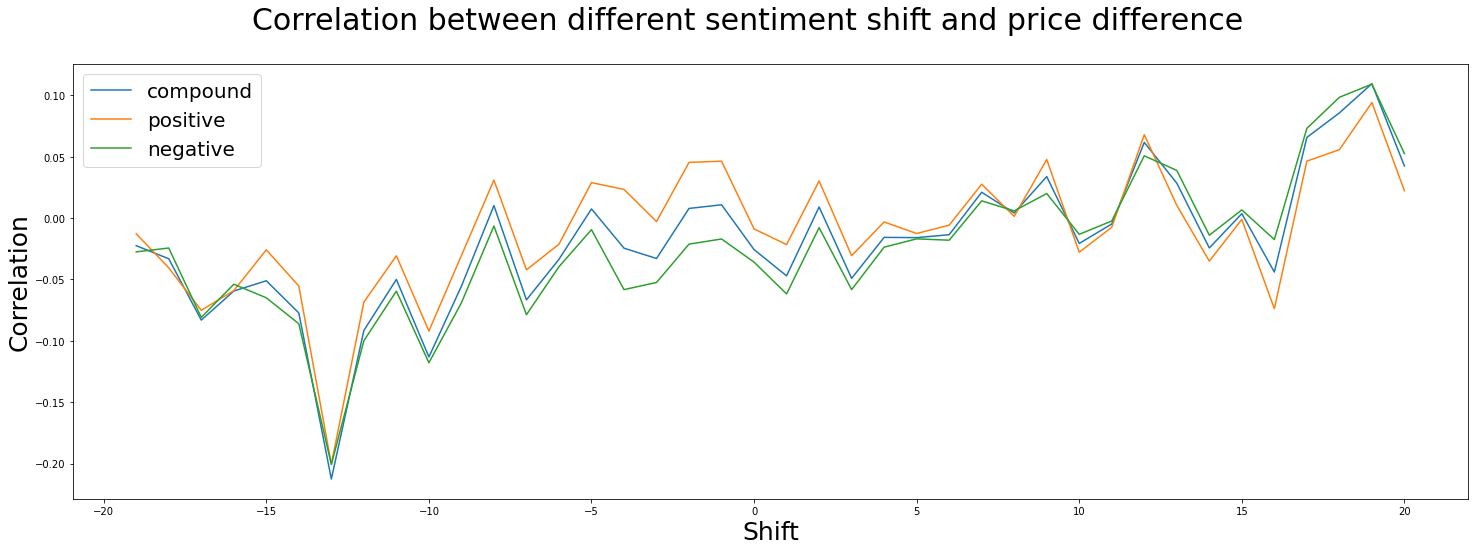

In [123]:
compound = shift_correlation(df,'C_trans_comp','diff',20)
positive = shift_correlation(df,'C_trans_pos','diff',20)
negative = shift_correlation(df,'C_trans_neg','diff',20)
different_shift_diff(compound,positive,negative,legend=['compound','positive','negative',],title='Correlation between different sentiment shift and price difference') 

Text(0.5, 0.98, 'correlation between Compound, positive and negative sentiment and price difference with increasing MAW')

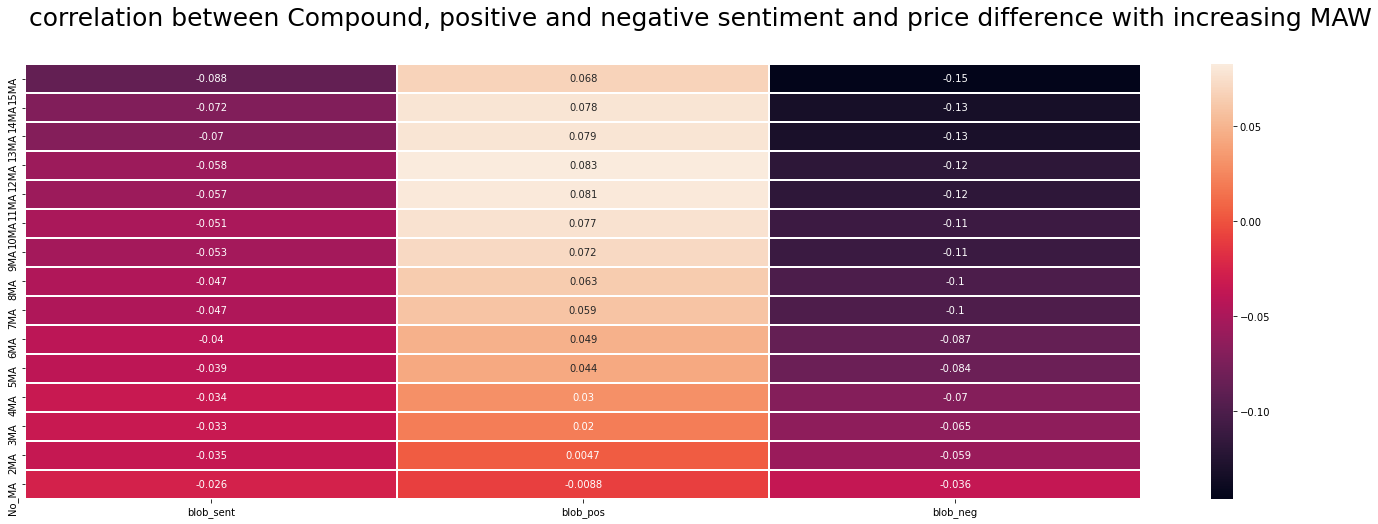

In [124]:
functions.diff_16MAW(df,'C_trans_comp','C_trans_pos','C_trans_neg')
plt.suptitle('correlation between Compound, positive and negative sentiment and price difference with increasing MAW',fontsize = 25)

<AxesSubplot:title={'center':'correlation of Transformer compound sentiment with different MAW and price difference with different shifts'}>

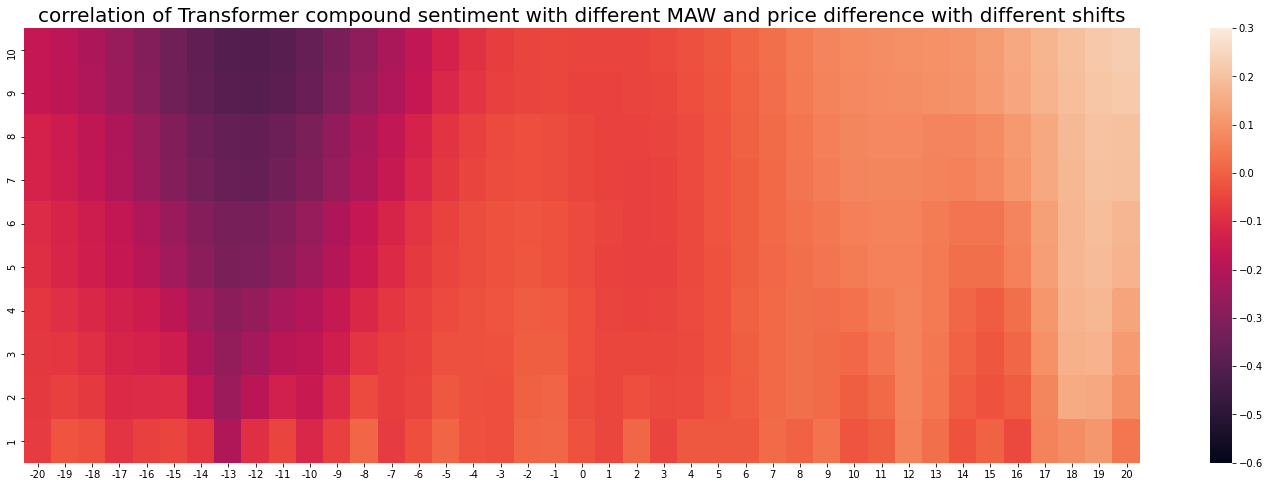

In [125]:
plt.title('correlation of Transformer compound sentiment with different MAW and price difference with different shifts', fontsize = 20) 
corrs, wlabels, llabels = functions.find_corr_matrix(df,'C_trans_comp','diff',range(-20,20+1),windows = range(1,10+1))  
sns.heatmap(corrs, xticklabels=llabels, yticklabels=wlabels, vmin=-0.6, vmax=0.3, annot = False)

<AxesSubplot:title={'center':'correlation of Transformer positive sentiment with different MAW and price difference with different shifts'}>

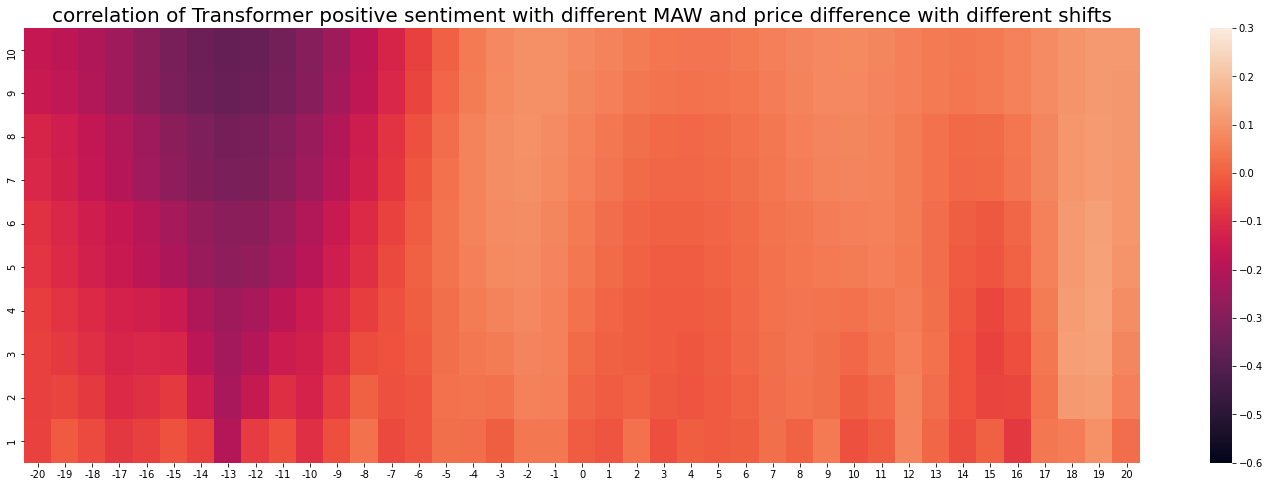

In [126]:
plt.title('correlation of Transformer positive sentiment with different MAW and price difference with different shifts', fontsize = 20) 
corrs, wlabels, llabels = functions.find_corr_matrix(df,'C_trans_pos','diff',range(-20,20+1),windows = range(1,10+1))  
sns.heatmap(corrs, xticklabels=llabels, yticklabels=wlabels, vmin=-0.6, vmax=0.3, annot = False)

<AxesSubplot:title={'center':'correlation of Transformer negative sentiment with different MAW and price difference with different shifts'}>

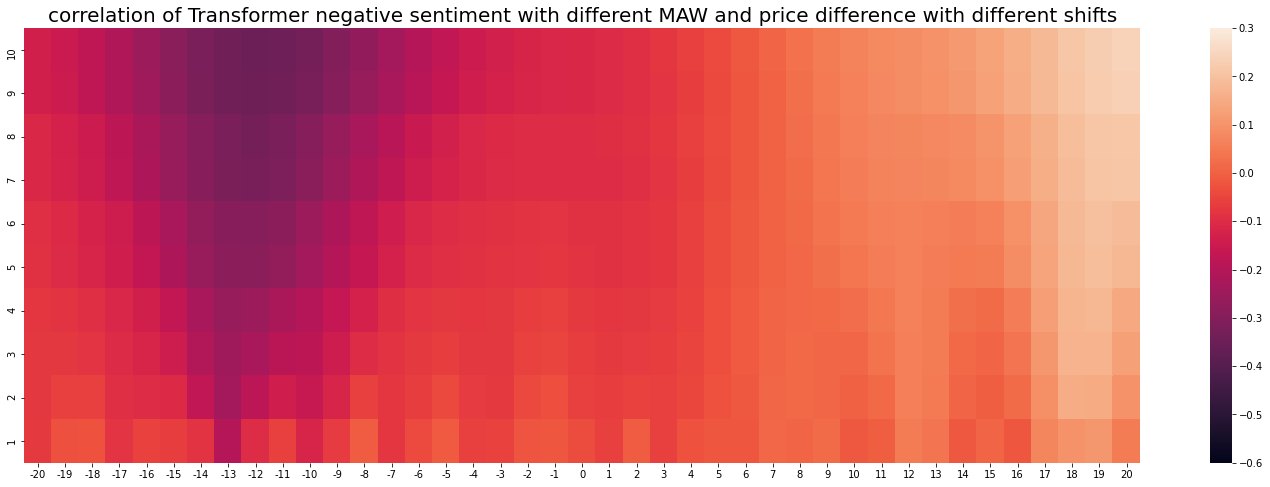

In [127]:
plt.title('correlation of Transformer negative sentiment with different MAW and price difference with different shifts', fontsize = 20) 
corrs, wlabels, llabels = functions.find_corr_matrix(df,'C_trans_neg','diff',range(-20,20+1),windows = range(1,10+1))  
sns.heatmap(corrs, xticklabels=llabels, yticklabels=wlabels, vmin=-0.6, vmax=0.3, annot = False)